In [1]:
import jax
import jax.numpy as jnp

x = jnp.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


2024-07-14 21:39:34.069461: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.1 which is older than the ptxas CUDA version (12.5.82). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [2]:
jax.devices()

[cuda(id=0)]

In [3]:
x

Array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [4]:
import numpy as np

size = int(2e7)
v1 = np.arange(size)
v2 = jnp.arange(size)

In [5]:
%timeit np.dot(v1, v1)

13.2 ms ± 428 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%timeit jnp.dot(v2, v2).block_until_ready()

284 µs ± 33.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [7]:
def f(x):
  return jnp.sum(x**2)


df = jax.grad(f)
x = jnp.arange(size).astype(jnp.float32)

print(f(x))
print(df(x))

2.6666663e+21
[0.0000000e+00 2.0000000e+00 4.0000000e+00 ... 3.9999992e+07 3.9999996e+07
 4.0000000e+07]


In [8]:
from jax import random

def g(x, y):
  return jnp.sum((x-y)**2)

dg = jax.grad(g)

key = random.PRNGKey(0)
y = random.normal(key, [size])

print(dg(x, y))

[-1.0544010e+00  1.6918590e+00  1.6895866e+00 ...  3.9999996e+07
  3.9999996e+07  4.0000000e+07]


In [9]:
a = random.uniform(key)
print(a)
b = random.uniform(key)
print(b)  # same as a
c = random.uniform(key)
print(c)  # still the same

# need to call `random.split` to get new random number
key, subkey = random.split(key)
d = random.uniform(key)
print(d)
e = random.uniform(subkey)
print(e)

0.41845703
0.41845703
0.41845703
0.5572065
0.10536897


In [10]:
# this gives both value and gradients
jax.value_and_grad(g)(x, y)

(Array(2.6666663e+21, dtype=float32),
 Array([-1.0544010e+00,  1.6918590e+00,  1.6895866e+00, ...,
         3.9999996e+07,  3.9999996e+07,  4.0000000e+07], dtype=float32))

In [11]:
def g2(x, y):
  return g(x, y), x-y

jax.grad(g2, has_aux=True)(x, y)

(Array([-1.0544010e+00,  1.6918590e+00,  1.6895866e+00, ...,
         3.9999996e+07,  3.9999996e+07,  4.0000000e+07], dtype=float32),
 Array([-5.2720052e-01,  8.4592950e-01,  8.4479332e-01, ...,
         1.9999998e+07,  1.9999998e+07,  2.0000000e+07], dtype=float32))

In [12]:
a1 = jnp.array([1, 2, 3])


def change(arr):
  return a1.at[1].set(666)

a2 = change(a1)
print(a1)
print(a2)

[1 2 3]
[  1 666   3]


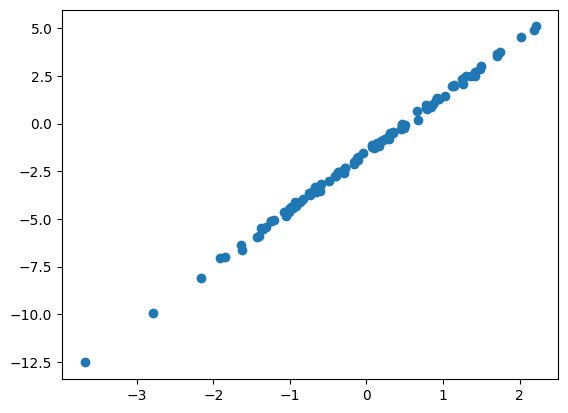

In [13]:
import matplotlib.pyplot as plt

key = random.PRNGKey(666)
xs = random.normal(key, (100,))
key, _ = random.split(key)
noise = random.normal(key, (100,)) * 0.1
ys = xs * 3 - 1.5 + noise

plt.scatter(xs, ys)

In [14]:
def f(A, xs):
  return A[0] * xs + A[1]

def loss_fn(A, xs, ys):
  y = f(A, xs)
  return jnp.mean((y - ys) ** 2)

def grad_descent(xs, ys):
  d_error = jax.grad(loss_fn)

  A = jnp.array([1.0, 1.0])
  alpha = 1e-1
  for i in range(100):
    gradients = d_error(A, xs, ys)
    A -= alpha * gradients
  return A

A = grad_descent(xs, ys)
A

Array([ 2.9894981, -1.5130677], dtype=float32)

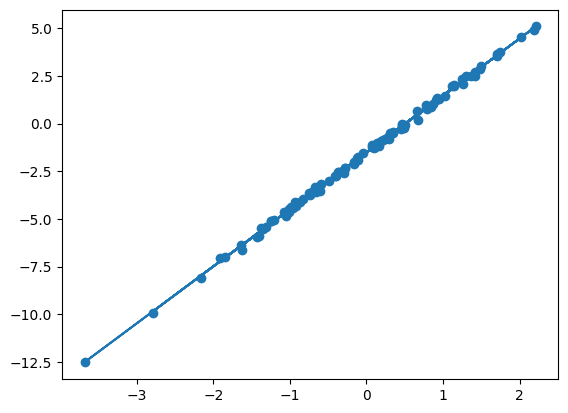

In [15]:
plt.scatter(xs, ys)
plt.plot(xs, f(A, xs))